# Multi-Layer Perceptron, MNIST
---
In this notebook, we will train an MLP to classify images from the [MNIST database](http://yann.lecun.com/exdb/mnist/) hand-written digit database.

The process will be broken down into the following steps:
>1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset!

Before we begin, we have to import the necessary libraries for working with data and PyTorch.

In [1]:
# import libraries
import torch
import numpy as np
from PIL import Image

---
## Load and Visualize the [Data](http://pytorch.org/docs/stable/torchvision/datasets.html)

Downloading may take a few moments, and you should see your progress as the data is loading. You may also choose to change the `batch_size` if you want to load more data at a time.

This cell will create DataLoaders for each of our datasets.

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64
# percentage of training set to use as validation
valid_size = 0.2

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

### Visualize a Batch of Training Data

The first step in a classification task is to take a look at the data, make sure it is loaded in correctly, then make any initial observations about patterns in that data.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

NameError: name 'train_loader' is not defined

### View an Image in More Detail

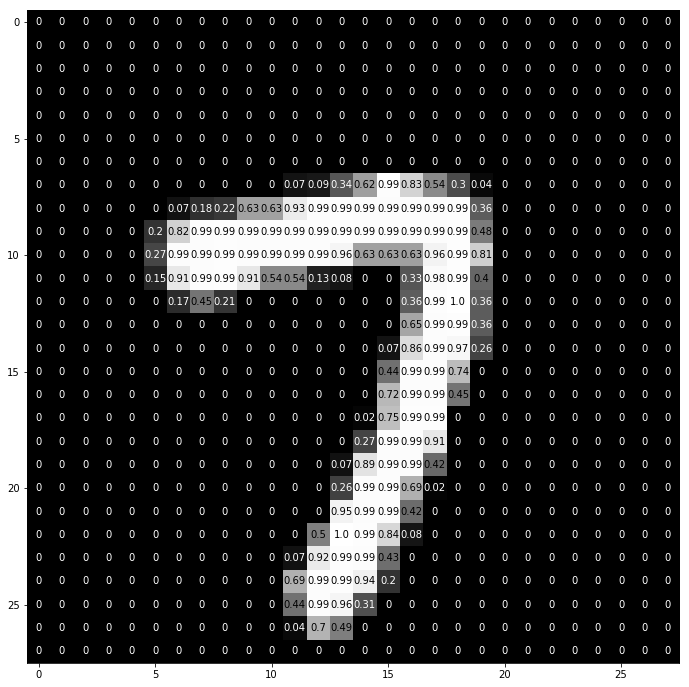

In [4]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

The architecture will be responsible for seeing as input a 784-dim Tensor of pixel values for each image, and producing a Tensor of length 10 (our number of classes) that indicates the class scores for an input image. This particular example uses two hidden layers and dropout to avoid overfitting.

In [6]:
import torch.nn as nn
import torch.nn.functional as F

def mila(input, beta=1.0):
    '''
    Applies the Mila function element-wise:
    Mila(x) = x * tanh(softplus(1 + β)) = x * tanh(ln(1 + exp(x+β)))
    See additional documentation for mila class.
    '''
    return input * torch.tanh(F.softplus(input+beta))

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 256
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = mila(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = mila(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

def mila(input, beta=1.0):
    '''
    Applies the Mila function element-wise:
    Mila(x) = x * tanh(softplus(1 + β)) = x * tanh(ln(1 + exp(x+β)))
    See additional documentation for mila class.
    '''
    return input * torch.tanh(F.softplus(input+beta))

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model_relu = Net()
print(model_relu)

###  Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

It's recommended that you use cross-entropy loss for classification. If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a softmax funtion to the output layer *and* then calculates the log loss.

In [3]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)

In [4]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.Adam(model_relu.parameters(), lr=0.001)

NameError: name 'model_relu' is not defined

---
## Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)
6. Update average training loss

The following loop trains for 50 epochs; take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data.

In [7]:
# number of epochs to train the model
n_epochs = 50

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model_relu.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_relu(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model_relu.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_relu(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model_relu.state_dict(), 'model_relu.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.767620 	Validation Loss: 0.085004
Validation loss decreased (inf --> 0.085004).  Saving model ...
Epoch: 2 	Training Loss: 0.288777 	Validation Loss: 0.064357
Validation loss decreased (0.085004 --> 0.064357).  Saving model ...
Epoch: 3 	Training Loss: 0.231203 	Validation Loss: 0.052979
Validation loss decreased (0.064357 --> 0.052979).  Saving model ...
Epoch: 4 	Training Loss: 0.191698 	Validation Loss: 0.045988
Validation loss decreased (0.052979 --> 0.045988).  Saving model ...
Epoch: 5 	Training Loss: 0.161971 	Validation Loss: 0.039707
Validation loss decreased (0.045988 --> 0.039707).  Saving model ...
Epoch: 6 	Training Loss: 0.141026 	Validation Loss: 0.035701
Validation loss decreased (0.039707 --> 0.035701).  Saving model ...
Epoch: 7 	Training Loss: 0.123587 	Validation Loss: 0.031777
Validation loss decreased (0.035701 --> 0.031777).  Saving model ...
Epoch: 8 	Training Loss: 0.109185 	Validation Loss: 0.029636
Validation loss decreased (0.03177

In [22]:
# number of epochs to train the model
n_epochs = 50

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_mila.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.027177 	Validation Loss: 0.074477
Validation loss decreased (inf --> 0.074477).  Saving model ...
Epoch: 2 	Training Loss: 0.025250 	Validation Loss: 0.074494
Epoch: 3 	Training Loss: 0.026733 	Validation Loss: 0.074506
Epoch: 4 	Training Loss: 0.028086 	Validation Loss: 0.074517
Epoch: 5 	Training Loss: 0.025403 	Validation Loss: 0.074537
Epoch: 6 	Training Loss: 0.025922 	Validation Loss: 0.074550
Epoch: 7 	Training Loss: 0.027193 	Validation Loss: 0.074527
Epoch: 8 	Training Loss: 0.025316 	Validation Loss: 0.074534
Epoch: 9 	Training Loss: 0.027660 	Validation Loss: 0.074518
Epoch: 10 	Training Loss: 0.024286 	Validation Loss: 0.074532
Epoch: 11 	Training Loss: 0.025079 	Validation Loss: 0.074550


KeyboardInterrupt: 

###  Load the Model with the Lowest Validation Loss

In [5]:
model.load_state_dict(torch.load('model.pt'))

RuntimeError: Error(s) in loading state_dict for Net:
	size mismatch for fc2.weight: copying a param with shape torch.Size([512, 512]) from checkpoint, the shape in current model is torch.Size([256, 512]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for fc3.weight: copying a param with shape torch.Size([10, 512]) from checkpoint, the shape in current model is torch.Size([10, 256]).

In [7]:
model.load_state_dict(torch.load('model_mila.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

---
## Test the Trained Network

Finally, we test our best model on previously unseen **test data** and evaluate it's performance. Testing on unseen data is a good way to check that our model generalizes well. It may also be useful to be granular in this analysis and take a look at how this model performs on each class as well as looking at its overall loss and accuracy.

In [7]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.060903

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 98% (1013/1032)
Test Accuracy of     3: 98% (993/1010)
Test Accuracy of     4: 98% (969/982)
Test Accuracy of     5: 98% (875/892)
Test Accuracy of     6: 98% (945/958)
Test Accuracy of     7: 98% (1010/1028)
Test Accuracy of     8: 97% (954/974)
Test Accuracy of     9: 98% (991/1009)

Test Accuracy (Overall): 98% (9845/10000)


In [24]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.060903

Test Accuracy of     0: 98% (970/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 98% (1013/1032)
Test Accuracy of     3: 98% (993/1010)
Test Accuracy of     4: 98% (969/982)
Test Accuracy of     5: 98% (875/892)
Test Accuracy of     6: 98% (945/958)
Test Accuracy of     7: 98% (1010/1028)
Test Accuracy of     8: 97% (954/974)
Test Accuracy of     9: 98% (991/1009)

Test Accuracy (Overall): 98% (9845/10000)


### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

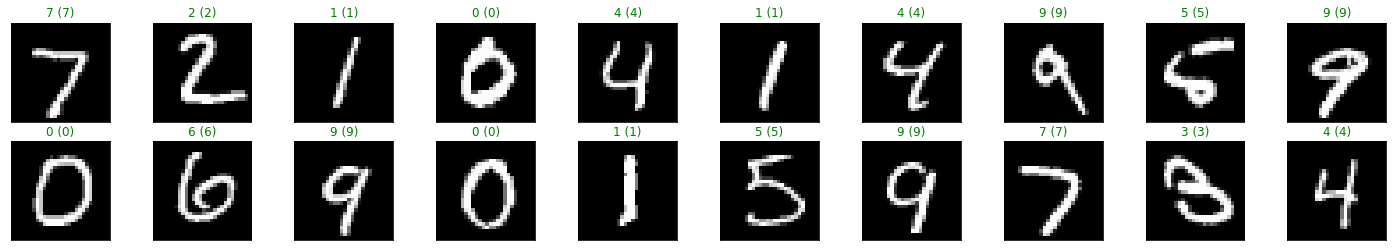

In [18]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

In [17]:
import cv2
#import matplotlib as plt
def load_image(filename,model):
	#import and preprocess image
	img = Image.open(filename).convert('LA')
	array = np.array(img)[:,:,0]
	array = 255-array
	divisor = array.shape[0]//9

	puzzle = []
	for i in range(9):
	    row = []
	    for j in range(9):
	        #slice image, reshape it to 28x28 (mnist reader size)
	        row.append(cv2.resize(array[i*divisor:(i+1)*divisor,
	                                    j*divisor:(j+1)*divisor][3:-3, 3:-3], 
	                              dsize=(28,28), 
	                              interpolation=cv2.INTER_CUBIC))
	    puzzle.append(row)

	return puzzle

	

In [18]:
puzzle=load_image(r'sudoku.png',model)

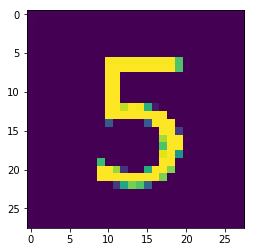

In [19]:
plt.imshow(puzzle[0][0])

In [76]:
a=torch.from_numpy(puzzle[8][4])/255
res=model(a.float())
_,pred=res.max(1)
print(res)
print(res[0][pred].item())
print(pred.item())

tensor([[ 2.9788, -8.1470, -1.1811,  0.2738, -7.1396, -0.9464,  0.2995, -7.4521,
          9.6153,  0.7604]], grad_fn=<AddmmBackward>)
9.615286827087402
8


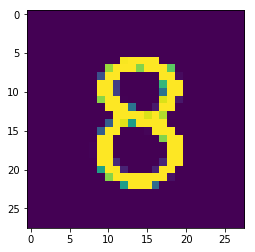

In [74]:
plt.imshow(puzzle[8][4])

In [77]:
container = [[0 for _ in range(9)] for _ in range(9)]
for i, row in enumerate(puzzle):
            for j, spot in enumerate(row):
                    a=torch.from_numpy(spot)/255
                    res=model(a.float())
                    _,pred=res.max(1)
                    #print(pred.item())
                    if (res[0][pred].item()>=6):
                        container[i][j] = pred.item()
                    #template[i][j] = model.forward(spot.reshape(1,28,28,1).astype('float32')/255)
#print(container)

        

Populating the interactive namespace from numpy and matplotlib


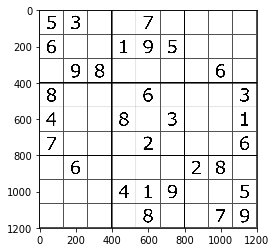

In [78]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(r'sudoku.png')
imgplot = plt.imshow(img)
plt.show()

In [81]:
container

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 5, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 0, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 0, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 0, 0, 0, 7, 9]]

In [80]:
container[8][4]=0

In [47]:
def print_grid(arr): 
    for i in range(9): 
        for j in range(9): 
            print(arr[i][j])
         
  
          
# Function to Find the entry in the Grid that is still  not used 
# Searches the grid to find an entry that is still unassigned. If 
# found, the reference parameters row, col will be set the location 
# that is unassigned, and true is returned. If no unassigned entries 
# remain, false is returned. 
# 'l' is a list  variable that has been passed from the solve_sudoku function 
# to keep track of incrementation of Rows and Columns 
def find_empty_location(arr,l): 
    for row in range(9): 
        for col in range(9): 
            if(arr[row][col]==0): 
                l[0]=row 
                l[1]=col 
                return True
    return False
  
# Returns a boolean which indicates whether any assigned entry 
# in the specified row matches the given number. 
def used_in_row(arr,row,num): 
    for i in range(9): 
        if(arr[row][i] == num): 
            return True
    return False
  
# Returns a boolean which indicates whether any assigned entry 
# in the specified column matches the given number. 
def used_in_col(arr,col,num): 
    for i in range(9): 
        if(arr[i][col] == num): 
            return True
    return False
  
# Returns a boolean which indicates whether any assigned entry 
# within the specified 3x3 box matches the given number 
def used_in_box(arr,row,col,num): 
    for i in range(3): 
        for j in range(3): 
            if(arr[i+row][j+col] == num): 
                return True
    return False
  
# Checks whether it will be legal to assign num to the given row,col 
#  Returns a boolean which indicates whether it will be legal to assign 
#  num to the given row,col location. 
def check_location_is_safe(arr,row,col,num): 
      
    # Check if 'num' is not already placed in current row, 
    # current column and current 3x3 box 
    return not used_in_row(arr,row,num) and not used_in_col(arr,col,num) and not used_in_box(arr,row - row%3,col - col%3,num) 
  
# Takes a partially filled-in grid and attempts to assign values to 
# all unassigned locations in such a way to meet the requirements 
# for Sudoku solution (non-duplication across rows, columns, and boxes) 
def solve_sudoku(arr): 
      
    # 'l' is a list variable that keeps the record of row and col in find_empty_location Function     
    l=[0,0] 
      
    # If there is no unassigned location, we are done     
    if(not find_empty_location(arr,l)): 
        return True
      
    # Assigning list values to row and col that we got from the above Function  
    row=l[0] 
    col=l[1] 
      
    # consider digits 1 to 9 
    for num in range(1,10): 
          
        # if looks promising 
        if(check_location_is_safe(arr,row,col,num)): 
              
            # make tentative assignment 
            arr[row][col]=num 
  
            # return, if success, ya! 
            if(solve_sudoku(arr)): 
                return True
  
            # failure, unmake & try again 
            arr[row][col] = 0
              
    # this triggers backtracking         
    return False

In [82]:
if(solve_sudoku(container)): 
        print(container)
else:
    print("No solution exists")
        


[[5, 3, 2, 6, 7, 8, 9, 1, 4], [6, 7, 4, 1, 9, 5, 8, 3, 2], [1, 9, 8, 3, 4, 2, 6, 5, 7], [8, 1, 9, 7, 6, 4, 5, 2, 3], [4, 2, 6, 8, 5, 3, 7, 9, 1], [7, 5, 3, 9, 2, 1, 4, 8, 6], [9, 6, 1, 5, 3, 7, 2, 4, 8], [2, 8, 7, 4, 1, 9, 3, 6, 5], [3, 4, 5, 2, 8, 6, 1, 7, 9]]


In [83]:
container

[[5, 3, 2, 6, 7, 8, 9, 1, 4],
 [6, 7, 4, 1, 9, 5, 8, 3, 2],
 [1, 9, 8, 3, 4, 2, 6, 5, 7],
 [8, 1, 9, 7, 6, 4, 5, 2, 3],
 [4, 2, 6, 8, 5, 3, 7, 9, 1],
 [7, 5, 3, 9, 2, 1, 4, 8, 6],
 [9, 6, 1, 5, 3, 7, 2, 4, 8],
 [2, 8, 7, 4, 1, 9, 3, 6, 5],
 [3, 4, 5, 2, 8, 6, 1, 7, 9]]